# Hypothesis Testing

In [1]:
from math import sqrt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy import stats

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

    - Has the network latency gone up since we switched internet service providers?
    - Is the website redesign any good?
    - Is our television ad driving more sales?

Data Sources:
- Archived round-trip time (RTT)

Hypotheses:
- $H_0$: There has been no change to RTT since switching ISPs

- $H_a$: RTT increased speed since swithing ISPs

Results:
- True Positive:
    - low p-value
    - RTT has increased speed since switching ISPs
- False Positive (Type I):
    - low p-value
    - RTT has increased speed, but not as a result of changing ISPs
- True Negative:
    - high p-value
    - RTT has not changed since switching ISPs
- False Negative (Type II):
    - high p-value
    - RTT has not changed, but 

Data Sources:
- Customer satisfaction surveys

Hypotheses:
- $H_0$: Customer satisfaction has not changed since website has been redesigned

- $H_a$: Customer satisfaction has improved since website has been redesigned

Results:
- True Positive:
    - low p-value
    - reject $H_0$
    - Customer satisfaction has improved as a result of the redesigned website
- False Positive (Type I):
    - low p-value
    - reject $H_0$
    - Customer satisfaction has improved, but as a result of a recent sale not the website redesign
- True Negative:
    - high p-value
    - fail to reject $H_0$
    - Customer satisfaction has not changed as a result of the redesigned website
- False Negative (Type II):
    - high p-value
    - fail to reject $H_0$
    - Customer satisfaction has not changed, but not as a direct result of the redesigned website but rather the company's unethical business practices

Data Sources:
- Sales by lead source data

Hypotheses:
- $H_0$: Sales directly attributed to TV ads have not changed as a result of the new TV add

- $H_a$: Sales directly attributed to TV ads have increased as a result of the new TV add

Results:
- True Positive:
    - low p-value
    - reject $H_0$
    - Sales attributed to TV ads have increased as a result of the new TV ad
- False Positive (Type I):
    - low p-value
    - reject $H_0$
    - Sales attributed to TV add has increases, but not because of the TV add but rather bad data entry from the sales professional
- True Negative:
    - high p-value
    - fail to reject $H_0$
    - Sales attributed to TV ads have not increased as a result of the new TV ad
- False Negative (Type II):
    - high p-value
    - fail to reject $H_0$
    - Sales attributed to TV adds have not increased, not a as a direct result of the TV add but rather people are streaming as opposed to watching TV.

---
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

$H_0$: There is no difference in the amount of time it takes to sell a home when comparing offices

$H_a$: There is a difference in the amount of time it takes to sell a home when comparing offices

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 -2}} $$

In [2]:
alpha = .05

xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = (n1 + n2) - 2

s_p = sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2)
    /
    (n1 + n2 - 2)
)

t = (xbar1 - xbar2) / (s_p * sqrt((1/n1) + (1/n2)))

In [3]:
t

-2.6252287036468456

use cdf for negative t values and sf for positive
p value is "how likely is is that we observe the t_stat or something more extreme?"

In [28]:
p = stats.t(degf).cdf(t) * 2
p

0.01020985244923939

In [27]:
# from walk-through
t, p = stats.ttest_ind_from_stats(xbar1, s1, n1, xbar2, s2, n2)

one_tailed_p = p / 2
one_tailed_p

0.005104926224619695

In [5]:
print(f"""
Because p ({p:.2f}) > alpha ({alpha}), we fail to reject the null hypothesis:
There is no difference in the amount of time it takes to sell a home when comparing offices

In plain english: I believe there is no difference in the amount of time it takes to sell a home between the two offices
""")


Because p (1.99) > alpha (0.05), we fail to reject the null hypothesis:
There is no difference in the amount of time it takes to sell a home when comparing offices

In plain english: I believe there is no difference in the amount of time it takes to sell a home between the two offices



---
- Load the mpg dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?

In [6]:
from pydataset import data

In [7]:
data("mpg", show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [8]:
mpg = data("mpg")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


>Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$: There is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_a$: There is a difference in fuel-efficiency in cars from 2008 vs 1999

In [9]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
cty1 = mpg[mpg.year == 1999].cty
cty2 = mpg[mpg.year == 2008].cty

In [10]:
alpha = .05

t_stat, p = stats.ttest_ind(cty1, cty2)
print(f"t = {t_stat:.3}")
print(f"p = {p:.3}")

t = 0.567
p = 0.571


In [11]:
print(f"""
Because p ({p:.3f}) > alpha ({alpha}), we fail to reject the null hypothesis:
There is no difference in fuel-efficiency (cty) in cars from 2008 vs 1999

In plain english: I believe there is no difference in fuel-efficiency (cty) in cars from 2008 vs 1999
""")


Because p (0.571) > alpha (0.05), we fail to reject the null hypothesis:
There is no difference in fuel-efficiency (cty) in cars from 2008 vs 1999

In plain english: I believe there is no difference in fuel-efficiency (cty) in cars from 2008 vs 1999



In [12]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
hwy1 = mpg[mpg.year == 1999].hwy
hwy2 = mpg[mpg.year == 2008].hwy

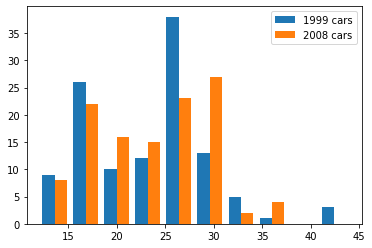

In [35]:
plt.hist([hwy1, hwy2], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")
plt.show()

In [13]:
alpha = .05

t_stat, p = stats.ttest_ind(hwy1, hwy2)
print(f"t = {t_stat:.3}")
print(f"p = {p:.3}")

t = -0.0329
p = 0.974


In [32]:
print(f"""
Because p ({p:.3f}) > alpha ({alpha}), we fail to reject the null hypothesis:
There is no difference in fuel-efficiency (hwy) in cars from 2008 vs 1999

In plain english: I believe there is no significant difference in fuel-efficiency (hwy) in cars from 2008 vs 1999
""")


Because p (0.000) > alpha (0.05), we fail to reject the null hypothesis:
There is no difference in fuel-efficiency (hwy) in cars from 2008 vs 1999

In plain english: I believe there is no significant difference in fuel-efficiency (hwy) in cars from 2008 vs 1999



>Are compact cars more fuel-efficient than the average car?

$H_0$: There is no difference in fuel-efficiency between compact cars and the average car

$H_a$: There is a difference in fuel-efficiency between compact cars and the average car

In [15]:
# Are compact cars more fuel-efficient than the average car?
alpha = .05

x = mpg[mpg["class"] == "compact"].cty
mu = mpg.cty.mean()

t_stat, p = stats.ttest_1samp(x, mu)
print(f"t = {t_stat:.3}")
print(f"p = {p:.3}")

t = 6.62
p = 3.4e-08


In [16]:
p < alpha

True

In [17]:
print(f"""
Because p ({p:.8f}) < alpha ({alpha}), we reject the null hypothesis:
There is no difference in fuel-efficiency (cty) between compact cars and the average car

In plain english: Compact cars' fuel-efficiency (cty) is significantly different than the average car
""")


Because p (0.00000003) < alpha (0.05), we reject the null hypothesis:
There is no difference in fuel-efficiency (cty) between compact cars and the average car

In plain english: Compact cars' fuel-efficiency (cty) is significantly different than the average car



In [18]:
# Are compact cars more fuel-efficient than the average car?
alpha = .05

x = mpg[mpg["class"] == "compact"].hwy
mu = mpg.hwy.mean()

t_stat, p = stats.ttest_1samp(x, mu)
print(f"t = {t_stat:.3}")
print(f"p = {p:.3}")

t = 8.81
p = 1.97e-11


In [19]:
p < alpha

True

In [20]:
print(f"""
Because p ({p:.11f}) < alpha ({alpha}), we reject the null hypothesis:
There is no difference in fuel-efficiency (hwy) between compact cars and the average car

In plain english: Compact cars' fuel-efficiency (hwy) is significantly different than the average car
""")


Because p (0.00000000002) < alpha (0.05), we reject the null hypothesis:
There is no difference in fuel-efficiency (hwy) between compact cars and the average car

In plain english: Compact cars' fuel-efficiency (hwy) is significantly different than the average car



>Do manual cars get better gas mileage than automatic cars?

$H_0$: There is no difference in fuel-efficiency between manual and automatic cars

$H_a$: There is a difference in fuel-efficiency between manual and automatic cars

In [21]:
# Do manual cars get better gas mileage than automatic cars?
mpg["transmission"] = mpg["trans"].str[:-4]
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual


In [22]:
mpg["avg_mpg"] = mpg[["cty", "hwy"]].mean(axis=1)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual,22.0


In [40]:
alpha = .05

manual = mpg[mpg.transmission == "manual"].hwy
auto = mpg[mpg.transmission == "auto"].hwy

t_stat, p = stats.ttest_ind(manual, auto)
print(f"t = {t_stat}")
print(f"p = {p}")

t = 4.368349972819688
p = 1.888044765552951e-05


In [30]:
p < alpha

True

In [31]:
print(f"""
Because p ({p:.6f}) < alpha ({alpha}), we reject the null hypothesis:
There is no difference in fuel-efficiency between manual and automatic cars

In plain english: Fuel-efficiency for manual and automatic cars is significantly different.
""")


Because p (0.000019) < alpha (0.05), we reject the null hypothesis:
There is no difference in fuel-efficiency between manual and automatic cars

In plain english: Fuel-efficiency for manual and automatic cars is significantly different.



In [42]:
mpg.groupby("transmission").hwy.mean()

transmission
auto      22.292994
manual    25.779221
Name: hwy, dtype: float64

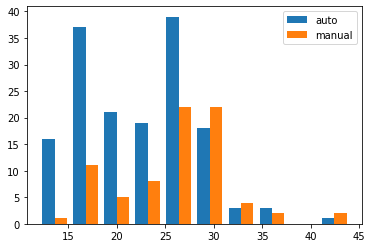

In [53]:
plt.hist([auto, manual], label=["auto", "manual"])
plt.legend()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

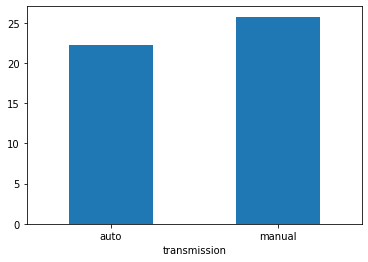

In [49]:
mpg.groupby("transmission").hwy.mean().plot.bar()
plt.xticks(rotation=0)